<a href="https://colab.research.google.com/github/brianp0513/NLP-project/blob/main/Hybrid_NLP_Project_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# data preprocessing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
%matplotlib inline
import time
import re
from wordcloud import WordCloud
import random
import os
from sklearn import metrics 
from scipy.spatial.distance import cdist 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
  
import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from collections import OrderedDict
import os
plt.style.use('ggplot')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [4]:
def getTextFromFiles(df, data_path, depression, limit):
    """Return Data Frame """

    for file in os.listdir(data_path)[:limit]:
        with open(data_path + "/" + file, 'r', encoding="ISO-8859-1") as file1:
            file1 = file1.read()
            df = df.append({'text': file1, 'depression': int(depression)}, ignore_index=True)

    return df


In [5]:
def dataPreprocessingForX(df, columnName1):
    df[columnName1] = df[columnName1].map(lambda text: text.lower())
    df[columnName1] = df[columnName1].map(lambda text: nltk.tokenize.word_tokenize(text))
    stop_words = set(nltk.corpus.stopwords.words('english'))
    df[columnName1] = df[columnName1].map(lambda tokens: [w for w in tokens if not w in stop_words])
    df[columnName1] = df[columnName1].map(lambda text: ' '.join(text))
    df[columnName1] = df[columnName1].map(lambda text: re.sub('[^A-Za-z]+', ' ', text))
    df[columnName1] = df[columnName1].map(lambda text: nltk.tokenize.word_tokenize(text))
    lemmatizer = WordNetLemmatizer()
    df[columnName1] = df[columnName1].map(lambda text: [lemmatizer.lemmatize(i) for i in text])
    df[columnName1] = df[columnName1].map(lambda text: ' '.join(text))

def dataPreprocessingForY(df, columnName2):
    df[columnName2] = df[columnName2].astype('int32')

In [99]:
data_path_d = "/content/drive/My Drive/NLP Team/code/kerasData/reddit_depression"
data_path_nd = "/content/drive/My Drive/NLP Team/code/kerasData/reddit_non_depression"
df = pd.DataFrame(columns=['text', 'depression'])
df = getTextFromFiles(df, data_path_d, 1, 1000)
df = getTextFromFiles(df, data_path_nd, 0, 500)


In [100]:
dataPreprocessingForX(df, 'text')
dataPreprocessingForY(df, 'depression')

In [101]:
X = df['text'].to_numpy()
Y = df['depression'].to_numpy()
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30)

max_words = 1000
max_len = 150

tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)


# classifier.fit(counts, Y_train)
# test_counts = count_vectorizer.transform(X_test)
# predictions = classifier.predict(test_counts)

# K mean

In [102]:

def kmean(X_train_kmean):
  init_centroid = 'k-means++'
  y_kmList = []
  distortions = [] 
  inertias = [] 
  mapping1 = {} 
  mapping2 = {}
  K = range(1,10)
  # X_train_kmean =  test_sequences_matrix
  # X_train_kmean = counts.toarray()
  for k in K:
      #Building and fitting the model 
      kmeanModel = KMeans(n_clusters=k, init = init_centroid, random_state=0)
      y_km = kmeanModel.fit(X_train_kmean)  
        
      distortions.append(sum(np.min(cdist(X_train_kmean, kmeanModel.cluster_centers_, 
                        'euclidean'),axis=1)) / X_train_kmean.shape[0]) 
      inertias.append(kmeanModel.inertia_) 

      y_kmList.append(y_km.labels_)

      mapping1[k] = sum(np.min(cdist(X_train_kmean, kmeanModel.cluster_centers_, 
                  'euclidean'),axis=1)) / X_train_kmean.shape[0] 
      mapping2[k] = kmeanModel.inertia_ 


  plt.plot(K, distortions, 'bx-') 
  plt.xlabel('Values of K') 
  plt.ylabel('Distortion') 
  plt.title('The Elbow Method using Distortion') 
  plt.show() 

  # for key,val in mapping1.items(): 
  #   print(str(key)+' : '+str(val))
  
  # plt.plot(K, inertias, 'bx-')
  # plt.xlabel('Values of K')
  # plt.ylabel('Inertia')
  # plt.title('The Elbow Method using Inertia') 
  # plt.show() 

  # for key,val in mapping2.items(): 
  #   print(str(key)+' : '+str(val))


  return y_kmList
# print(np.shape(y_km))
# plt.scatter(X[y_km==0, 0], X[y_km==0,1],c='lightgreen',marker='s',s=510,label='cluster1')
# plt.scatter(X[y_km==1, 0], X[y_km==1,1],c='orange',marker='o',s=50,label='cluster2')
# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='red',marker='*',s=50,label='center')

# plt.legend()
# plt.grid(True)
# plt.show()


In [103]:
# print(sequences_matrix)
# print(y_kmList)

In [104]:
def kmeanClusterResult(y_kmList, X):
  zero_list = []
  one_list = []
  two_list = []

  for idx,iteration in enumerate(y_kmList[1]):
    if iteration == 1:
      one_list.append(idx)
    elif iteration == 2:
      two_list.append(idx)
    else:
      zero_list.append(idx)
  # print(zero_list)
  # print(one_list)
  # print(two_list)
  # print(X.shape)
  cluster_zero = []
  cluster_one = []
  cluster_two = []
  for index in zero_list:
    sentence = X[index]
    cluster_zero.append(sentence)
    
  # print(cluster_zero)
  for index in one_list:
    sentence = X[index]
    cluster_one.append(sentence)

  for index in two_list:
    sentence = X[index]
    cluster_two.append(sentence)

  return zero_list, one_list

In [105]:
def makeWorldCloud(llist):
  depression_words = ''.join(llist)
  depression_wordclod = WordCloud(width = 512,height = 512).generate(depression_words)
  plt.figure(figsize = (10, 8), facecolor = 'k')
  plt.imshow(depression_wordclod)
  plt.axis('off')
  plt.tight_layout(pad = 0)
  plt.show()
# makeWorldCloud(cluster_zero)
# makeWorldCloud(cluster_one)
# makeWorldCloud(cluster_two)

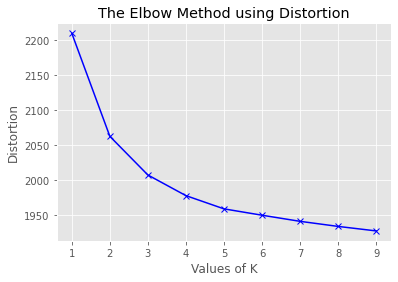

In [106]:
y_kmList = kmean(sequences_matrix)
zero_list, one_list = kmeanClusterResult(y_kmList, X)

# LSTM

In [107]:
# X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

max_words = 1000
max_len = 150

# tok = Tokenizer(num_words=max_words)
# tok.fit_on_texts(X_train)
# sequences = tok.texts_to_sequences(X_train)
# sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
# test_sequences = tok.texts_to_sequences(X_test)
# test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

sequences_zeroClust = tok.texts_to_sequences(X[zero_list])
sequences_matrix_zeroClust = sequence.pad_sequences(sequences_zeroClust,maxlen=max_len)
sequences_oneClust = tok.texts_to_sequences(X[one_list])
sequences_matrix_oneClust = sequence.pad_sequences(sequences_oneClust,maxlen=max_len)

test_sequences_matrix = sequences_matrix_zeroClust
Y_test_LSTM = Y[zero_list]

# test_sequences_matrix = sequences_matrix_oneClust
# Y_test = Y[one_list]

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_words,50,input_length=max_len))
model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('sigmoid'))

# model.build(input_shape=sequences_matrix.shape)
# model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

model.fit(sequences_matrix.astype(float), Y_train.astype(float), batch_size=4,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
accr = model.evaluate(test_sequences_matrix, Y_test_LSTM.astype(float))

print(" LSTM")
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))



Epoch 1/10
210/210 [==============================] - 2s 11ms/step - loss: 0.6370 - accuracy: 0.6619 - val_loss: 0.5727 - val_accuracy: 0.6524
Epoch 2/10
210/210 [==============================] - 2s 9ms/step - loss: 0.4221 - accuracy: 0.8190 - val_loss: 0.2966 - val_accuracy: 0.8810
Epoch 3/10
210/210 [==============================] - 2s 8ms/step - loss: 0.2368 - accuracy: 0.9155 - val_loss: 0.2743 - val_accuracy: 0.8905
Epoch 4/10
210/210 [==============================] - 2s 8ms/step - loss: 0.1108 - accuracy: 0.9595 - val_loss: 0.2678 - val_accuracy: 0.9190
Epoch 5/10
22/22 [==============================] - 0s 5ms/step - loss: 0.0901 - accuracy: 0.9657
 LSTM
Test set
  Loss: 0.090
  Accuracy: 0.966


# Naive Bayes

(450,)


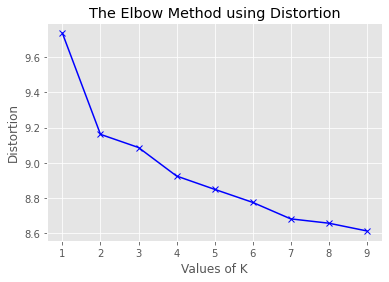

[9, 19, 21, 22, 28, 51, 55, 58, 65, 70, 73, 79, 87, 109, 111, 121, 141, 149, 159, 163, 164, 175, 183, 186, 196, 209, 216, 239, 247, 252, 256, 281, 303, 308, 313, 320, 332, 335, 338, 348, 349, 352, 354, 359, 364, 367, 374, 376, 384, 386, 387, 399, 414, 419, 422, 427, 431, 434, 438, 442, 443, 446, 459, 469, 473, 477, 480, 483, 491, 493, 496, 497, 502, 506, 507, 509, 515, 536, 558, 560, 565, 569, 574, 593, 601, 602, 615, 625, 626, 629, 633, 634, 636, 637, 640, 649, 653, 658, 662, 667, 692, 693, 699, 707, 721, 725, 729, 733, 739, 742, 749, 750, 751, 753, 757, 760, 761, 763, 765, 768, 774, 775, 784, 786, 797, 800, 815, 819, 848, 864, 866, 871, 873, 885, 886, 899, 901, 917, 947, 950, 972, 973, 979, 990, 996, 1013, 1014, 1018, 1028, 1029, 1030, 1035, 1041]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 56, 57, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 71, 

In [108]:
classifier = MultinomialNB()
# count_vectorizer = CountVectorizer(ngram_range = ngram_range, min_df = min_df)
# counts = count_vectorizer.fit_transform(X_train)
# featnames = count_vectorizer.get_feature_names()
# classifier.fit(counts, Y_train)

ngram_range = (1,2)
min_df = 50
count_vectorizer = CountVectorizer(ngram_range = ngram_range, min_df = min_df)
counts = count_vectorizer.fit_transform(X_train)

# featnames = count_vectorizer.get_feature_names()
classifier.fit(counts, Y_train)
print(X_test.shape)
# test_counts = count_vectorizer.transform(X_test)
# X[zero_list]
# y_kmList = kmean(test_counts.toarray())


y_kmList = kmean(counts.toarray())
zero_list, one_list = kmeanClusterResult(y_kmList, X)
print(zero_list)
print(one_list)


test_counts = count_vectorizer.transform(X[zero_list])
# predictions = classifier.predict(test_counts[zero_list])
predictions = classifier.predict(test_counts)

Y_test = Y[zero_list]

print(predictions)
# Y[one_list]
print("Accuracy: ",(predictions == Y_test).mean())
